# Objective
In this notebook I will try to predict expected salary for **Data Science** jobs in glassdoor applying different model. Previously this data was collected from glassdoor using webscrapping. I have already made two notebooks where, I cleaned glassdoor data in one notebook and also did exploratory data analysis in other notebook to understand the pattern of the data. By applying differet type of algorithm I will learn how my model work.

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split


In [138]:
df = pd.read_csv("clean_glassdoor_job_data.csv")
pd.options.display.max_columns = 99
display(df.head(3))



,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_Title,Seniority,Salary,Min_Salary,Max_Salary,Per_Hour,Average_Salary,Employer_Provide,Company_Name,Job_State,Same_State,Company_Age,Python,Spark,R_Studio,SQL,AWS,Statistics,Excel,Bachelor,Description_len,Competitiors_Number
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Data Scientist,Na,53-91,53,91,0,72.0,0,Tecolote Research,NM,0,48,1,0,0,0,0,0,1,1,2536,0
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,Data Scientist,Na,63-112,63,112,0,87.5,0,University of Maryland Medical System,MD,0,37,1,0,0,0,0,1,0,0,4783,0
2,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,Data Scientist,Na,80-90,80,90,0,85.0,0,KnowBe4,FL,1,11,1,1,0,1,0,1,1,0,3461,0


In [139]:
df.columns

Index(['Salary Estimate', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'Job_Title',
       'Seniority', 'Salary', 'Min_Salary', 'Max_Salary', 'Per_Hour',
       'Average_Salary', 'Employer_Provide', 'Company_Name', 'Job_State',
       'Same_State', 'Company_Age', 'Python', 'Spark', 'R_Studio', 'SQL',
       'AWS', 'Statistics', 'Excel', 'Bachelor', 'Description_len',
       'Competitiors_Number'],
      dtype='object')

# Relevent column
We don't need to use all columns. I will use those columns that I had found relevant after using the EDA.

In [140]:
#Choose relevent column
df_prototype = df[['Average_Salary','Rating', 'Size', 'Type of ownership','Industry', 'Sector',
                  'Revenue','Employer_Provide','Job_State', 'Same_State','Company_Age','Python',
                  'Spark', 'R_Studio', 'SQL', 'AWS','Statistics', 'Excel', 'Bachelor', 'Description_len',
                   'Competitiors_Number']]
df_dum = pd.get_dummies(df_prototype)
df_dum

,Average_Salary,Rating,Employer_Provide,Same_State,Company_Age,Python,Spark,R_Studio,SQL,AWS,Statistics,Excel,Bachelor,Description_len,Competitiors_Number,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,...,Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Job_State_AL,Job_State_AZ,Job_State_CA,Job_State_CO,Job_State_CT,Job_State_DC,Job_State_DE,Job_State_FL,Job_State_GA,Job_State_IA,Job_State_ID,Job_State_IL,Job_State_IN,Job_State_KS,Job_State_KY,Job_State_LA,Job_State_MA,Job_State_MD,Job_State_MI,Job_State_MN,Job_State_MO,Job_State_NC,Job_State_NE,Job_State_NJ,Job_State_NM,Job_State_NY,Job_State_OH,Job_State_OR,Job_State_PA,Job_State_RI,Job_State_SC,Job_State_TN,Job_State_TX,Job_State_UT,Job_State_VA,Job_State_WA,Job_State_WI
0,72.0,3.8,0,0,48,1,0,0,0,0,0,1,1,2536,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,87.5,3.4,0,0,37,1,0,0,0,0,1,0,0,4783,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,85.0,4.8,0,1,11,1,1,0,1,0,1,1,0,3461,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,76.5,3.8,0,1,56,1,0,0,0,0,1,0,0,3883,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,114.5,2.9,0,1,23,1,0,0,1,0,1,1,0,2728,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,0,0,191,0,0,0,0,1,0,0,0,6162,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
738,102.5,4.4,0,0,15,1,1,0,1,1,0,0,0,6130,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
739,73.5,2.6,0,1,37,0,0,0,0,0,1,1,0,3078,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [141]:
df_prototype.shape

(742, 21)

# Split Data

In [142]:
#train model
X = df_dum.drop('Average_Salary', axis = 1)
y = df_dum.Average_Salary.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [143]:
def totalError(predict, present):
    error = 0 
    for i, j in zip(predict, present):
        error = error+ abs(i - j)
    return error

# Multiple Linear Regression

### Ordinary Linear Regression

The Ordinary Least Squares (OLS) regression provides a simple relationship between  Dependent and Independent variables. OLS method is widely used to estimate the parameter of a linear regression model. OLS estimators minimize the sum of the squared errors (a difference between observed values and predicted values). 

In [144]:
#multiple Linear regression
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predict = model.predict()
print(np.mean(cross_val_score(reg ,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5)))
model.summary()


-1223042.9372058487


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     4.858
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           8.13e-42
Time:                        08:41:04   Log-Likelihood:                -3468.7
No. Observations:                 742   AIC:                             7211.
Df Residuals:                     605   BIC:                             7843.
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                38.7602      8.420      4.604      0.000      22.225      55.296
Rating                                                6.5112      2.282      2.853      0.004       2.029      10.993
Employer_Provide                                     36.7823      8.080      4.552      0.000      20.913      52.651
Same_State                                            2.6323      3.190      0.825      0.410      -3.632       8.897
Company_Age                                           0.0032      0.036      0.088      0.930      -0.068       0.075
Python                                               16.9859      3.061      5.550      0.000      10.975      22.997
Spark                                                -0.2861      3.412     -0.084      0.933      -6.988       6.416
R_Studio                                           4.526e-12   5.23e-12      0.865      0.388   -5.75e-12    1.48e-11
SQL                                                  -8.0259      3.055     -2.627      0.009     -14.026      -2.026
AWS                                                   7.6221      3.243      2.350      0.019       1.253      13.991
Statistics                                            6.9382      2.912      2.383      0.017       1.220      12.656
Excel                                                -5.4101      2.756     -1.963      0.050     -10.822       0.002
Bachelor                                             -2.0311      4.154     -0.489      0.625     -10.189       6.127
Description_len                                      -0.0005      0.001     -0.537      0.592      -0.002       0.001
Competitiors_Number                                   2.1958      1.060      2.071      0.039       0.114       4.278
Size_-1                                               8.3602     10.345      0.808      0.419     -11.955      28.676
Size_1 to 50 employees                                0.5789      7.904      0.073      0.942     -14.945      16.102
Size_10000+ employees                                 7.8764      6.873      1.146      0.252      -5.621      21.374
Size_1001 to 5000 employees                           8.4591      4.541      1.863      0.063      -0.459      17.377
Size_201 to 500 employees                            -0.0139      4.711     -0.003      0.998      -9.266       9.238
Size_5001 to 10000 employees                         -0.7187      6.488     -0.111      0.912     -13.460      12.023
Size_501 to 1000 employees                           -1.6376      4.870     -0.336      0.737     -11.202       7.927
Size_51 to 200 employees                             -1.4054      5.284     -0.266      0.790     -11.783       8.972
Size_Unknown   

In [145]:
print("Error :", totalError(predict, y))

Error : 14433.040794925844


In [146]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
reg.fit(X_train, y_train)

np.mean(cross_val_score(reg ,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))


-1223042.9372058487

# Least Absolute Shrinkage and Selection operator(LASSO) Regression
Lasso was originally formulated for linear regression models.It is used over regression methods for a more accurate prediction.Lasso performs both variable selection and regularization in order to enhance the prediction accuracy.

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161.90393795090495, tolerance: 56.02663189873419
  model = cd_fast.enet_coordinate_descent(


,alpha,error
22,0.23,-24.206536


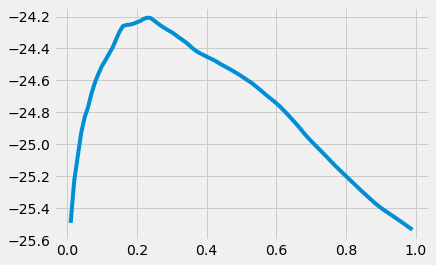

In [147]:

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
# lasso regression 
lasso = Lasso(alpha=.23)
lasso.fit(X_train,y_train)
np.mean(cross_val_score(lasso,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha ,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]


# Random Forest


In [148]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))



-18.693519800372595

By far Random Forest gave us best value.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

# test ensembles 
tpred_lm = reg.predict(X_test)
tpred_lml = lasso.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

print(tpred_lm)
print(tpred_lml)
print(tpred_rf)


In [ ]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])